Trained a simple machine learning model (persistence algorithm) to predict gold prices using a database of prices starting from 1950.

In [1]:
# Let´s import all necessary libraries
import numpy as np 
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gold_monthly_price.csv
/kaggle/input/README.md


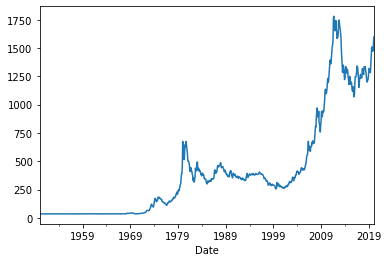

In [2]:
# Let's visualize the price progression using matplotlib

def parser(x):
    return datetime.strptime(x, '%Y-%m')
 
gold_prices = pd.read_csv('../input/gold_monthly_price.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
gold_prices.plot()
plt.show()

In [3]:
# Let's create a lagged dataset
lagged_dataset = pd.DataFrame(gold_prices.values)
dataframe = pd.concat([lagged_dataset.shift(5), lagged_dataset], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe)

            t       t+1
0         NaN    34.730
1         NaN    34.730
2         NaN    34.730
3         NaN    34.730
4         NaN    34.730
..        ...       ...
838  1358.488  1471.921
839  1414.611  1480.025
840  1497.102  1560.668
841  1510.336  1598.818
842  1494.765  1593.764

[843 rows x 2 columns]


In [4]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [5]:
# persistence model
def model_persistence(x):
    return x

In [6]:
# walk-forward validation
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    print('Here is a regression evaluation report of our model:\n')
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
    
regression_results(test_y, predictions)

Here is a regression evaluation report of our model:

explained_variance:  0.9658
mean_squared_log_error:  0.0086
r2:  0.9641
MAE:  64.7467
MSE:  8448.4542
RMSE:  91.9155


In [7]:
pyplot.plot(train_y, 'g')
pyplot.plot([None for i in train_y] + [x for x in test_y], 'g')
pyplot.plot([None for i in train_y] + [x for x in predictions], 'r')
pyplot.show()

NameError: name 'pyplot' is not defined

As we can see in the graph the prediction we made with our model is fairly decent.